 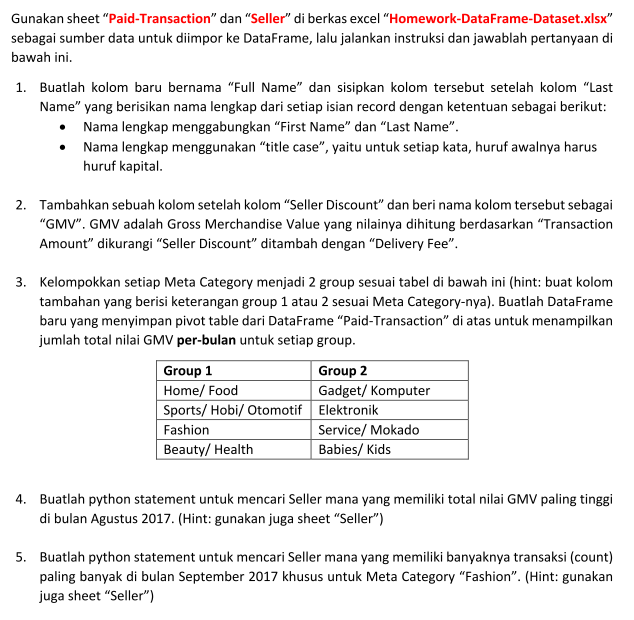

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Mount ke Google Drive untuk membaca file excel transactions.xlsx dengan 2 sheet Paid-Transaction dan Seller
df1 = pd.read_excel('/content/drive/MyDrive/Gcolab/transactions.xlsx', sheet_name=('Paid-Transaction'), header=1, usecols='B:L')
df2 = pd.read_excel('/content/drive/MyDrive/Gcolab/transactions.xlsx', sheet_name=('Seller'), header=1, usecols='B:C')

In [ ]:
# Melihat Isi data sheet Paid-Transaction
df1.head()

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0
1,20170701,201707018889790,BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.0,0,0.0
2,20170707,201707079264675,Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.0,0,0.0
3,20170720,201707209945714,Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,5900.0,0,0.0
4,20170722,201707220002354,rizal,Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,5600.0,0,0.0


In [ ]:
# Melihat Isi data sheet Seller
df2.head()

,Order Number,Seller
0,201707209929420,Global Phone
1,201707129550097,E-shop
2,201707039056021,twelven com
3,201707099376522,GRAMEDIA
4,201707028956707,E-Bold


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Paid Date           12000 non-null  int64  
 1   Order Number        12000 non-null  int64  
 2   First Name          11996 non-null  object 
 3   Last Name           11996 non-null  object 
 4   Meta Category       12000 non-null  object 
 5   Product Name        12000 non-null  object 
 6   Transaction Amount  12000 non-null  int64  
 7   Seller Discount     12000 non-null  int64  
 8   Sales Discount      12000 non-null  float64
 9   Delivery Fee        12000 non-null  int64  
 10  Other Discount      12000 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order Number  12000 non-null  int64 
 1   Seller        12000 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [ ]:
df1.shape

(12000, 11)

In [ ]:
df2.shape

(12000, 2)

In [ ]:
# Cek Data yang kosong dari sheet df1 Paid-Transaction
df1.isnull().sum()

Paid Date             0
Order Number          0
First Name            4
Last Name             4
Meta Category         0
Product Name          0
Transaction Amount    0
Seller Discount       0
Sales Discount        0
Delivery Fee          0
Other Discount        0
dtype: int64

In [ ]:
# Cek Data yang kosong dari sheet df2 Seller
df2.isnull().sum()

Order Number    0
Seller          0
dtype: int64

**Soal No.1 :**  (Buat kolom baru "Full Name" dan sisipkan setelah kolom "Last Name". Buat setiap Awal Kata dari kolom Full Name menjadi huruf Kapital

In [ ]:
# Membuat variabel df_FullName untuk operasi string menggabungkan 2 kolom First Name dan Last Name
df_FullName = df1['First Name'].map(str) + ' ' + df1['Last Name'].map(str)

# Membuat kolom baru Full Name dan disisipkan setelah kolom Last Name, index lokasi kolom = 4 dengan nilai value dari df_FullName
df1.insert(loc = 4, column = 'Full Name', value = df_FullName)

In [ ]:
# Mengubah data kolom Full Name dengan Lambda Function untuk membuat Huruf awal setiap kata dari kolom Full Name menjadi huruf kapital
df1['Full Name'] = df1['Full Name'].apply(lambda a: a.title())
df1.head()

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Elvride Aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,10200.0,9000,0.0
1,20170701,201707018889790,BASIR,Ninuk,Basir Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,0.0,0,0.0
2,20170707,201707079264675,Citra,Ardi,Citra Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,700.0,0,0.0
3,20170720,201707209945714,Dian,Renaldi,Dian Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,5900.0,0,0.0
4,20170722,201707220002354,rizal,Tamba,Rizal Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,5600.0,0,0.0


**Soal No.2:** (Tambahkan sebuah kolom setelah kolom “Seller Discount” dan beri nama kolom tersebut sebagai
“GMV”. GMV adalah Gross Merchandise Value yang nilainya dihitung berdasarkan “Transaction
Amount” dikurangi “Seller Discount” ditambah dengan “Delivery Fee”.

In [ ]:
# Membuat variabel GMV untuk menyimpan operasi
GMV = df1['Transaction Amount'] - df1['Seller Discount'] + df1['Delivery Fee']

# Menyisipkan kolom GMV disebelah kolom Seller Discount dengan value dari Operasi variabel GMV
df1.insert(loc = 9, column = 'GMV', value = GMV)

In [ ]:
df1.head()

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Elvride Aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0
1,20170701,201707018889790,BASIR,Ninuk,Basir Ninuk,Service/ Mokado,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0
2,20170707,201707079264675,Citra,Ardi,Citra Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0
3,20170720,201707209945714,Dian,Renaldi,Dian Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0
4,20170722,201707220002354,rizal,Tamba,Rizal Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0


**Soal 3:** Kelompokkan setiap Meta Category menjadi 2 group sesuai tabel di bawah ini (hint: buat kolom
tambahan yang berisi keterangan group 1 atau 2 sesuai Meta Category-nya). Buatlah DataFrame
baru yang menyimpan pivot table dari DataFrame “Paid-Transaction” di atas untuk menampilkan
jumlah total nilai GMV per-bulan untuk setiap group.

In [ ]:
# Mengelompokkan value kolom Meta Category kedalam 2 Group Category (Group 1 atau Group 2)
# Group_Category = df1['Meta Category'].map({'Home/ Food':'Group 1','Sports/ Hobi/ Otomotif':'Group 1', 'Fashion': 'Group 1', 'Beauty/ Health':'Group 1',
#                                           'Gadget/ Komputer':'Group 2', 'Elektronik':'Group 2', 'Service/ Mokado':'Group 2', 'Babies/ Kids':'Group 2'
#                                           })

In [ ]:
# Cara Lain Pengelompokkan
mapping = {'Home/ Food': 'Group 1', 'Sports/ Hobi/ Otomotif': 'Group 1',
           'Fashion': 'Group 1', 'Beauty/ Health': 'Group 1',
           'Gadget/ Komputer': 'Group 2', 'Elektronik': 'Group 2',
           'Service/ Mokado': 'Group 2', 'Babies/ Kids': 'Group 2'}

In [ ]:
Group_Category = df1['Meta Category'].replace(mapping)

In [ ]:
# Menyisipkan kolom Group Category setelah kolom Meta Category dan Memasukkan nilai pengelompokkan berdasarkan variabel operasi Group_Category
df1.insert(loc = 6, column = 'Group Category', value = Group_Category)

In [ ]:
df1.head()

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Group Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
0,20170724,201707240088517,elvride,aries,Elvride Aries,Babies/ Kids,Group 2,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0
1,20170701,201707018889790,BASIR,Ninuk,Basir Ninuk,Service/ Mokado,Group 2,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0
2,20170707,201707079264675,Citra,Ardi,Citra Ardi,Service/ Mokado,Group 2,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0
3,20170720,201707209945714,Dian,Renaldi,Dian Renaldi,Fashion,Group 1,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0
4,20170722,201707220002354,rizal,Tamba,Rizal Tamba,Gadget/ Komputer,Group 2,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0


In [ ]:
# Merubah Tipe Data integer pada Kolom Paid Date Menjadi DateTime dengan format YYYYMMDD
df1['Paid Date'] = pd.to_datetime(df1['Paid Date'], format='%Y%m%d')

In [ ]:
# cek kesesuaian tipe data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Paid Date           12000 non-null  datetime64[ns]
 1   Order Number        12000 non-null  int64         
 2   First Name          11996 non-null  object        
 3   Last Name           11996 non-null  object        
 4   Full Name           12000 non-null  object        
 5   Meta Category       12000 non-null  object        
 6   Group Category      12000 non-null  object        
 7   Product Name        12000 non-null  object        
 8   Transaction Amount  12000 non-null  int64         
 9   Seller Discount     12000 non-null  int64         
 10  GMV                 12000 non-null  int64         
 11  Sales Discount      12000 non-null  float64       
 12  Delivery Fee        12000 non-null  int64         
 13  Other Discount      12000 non-null  float64   

In [ ]:
# Cek display kolom Paid Date apakah sudah sesuai format
df1.head()

,Paid Date,Order Number,First Name,Last Name,Full Name,Meta Category,Group Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
0,2017-07-24,201707240088517,elvride,aries,Elvride Aries,Babies/ Kids,Group 2,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0
1,2017-07-01,201707018889790,BASIR,Ninuk,Basir Ninuk,Service/ Mokado,Group 2,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0
2,2017-07-07,201707079264675,Citra,Ardi,Citra Ardi,Service/ Mokado,Group 2,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0
3,2017-07-20,201707209945714,Dian,Renaldi,Dian Renaldi,Fashion,Group 1,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0
4,2017-07-22,201707220002354,rizal,Tamba,Rizal Tamba,Gadget/ Komputer,Group 2,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0


In [ ]:
# Menyisipkan kolom baru Month setelah Paid Date untuk menyimpan bulan transaksi ekstraksi month dari kolom Paid Date
month = pd.DatetimeIndex(df1['Paid Date']).month
df1.insert(loc = 1, column = 'Month', value = month)

In [ ]:
# Cek kesesuaian hasil
df1.head()

,Paid Date,Month,Order Number,First Name,Last Name,Full Name,Meta Category,Group Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
0,2017-07-24,7,201707240088517,elvride,aries,Elvride Aries,Babies/ Kids,Group 2,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0
1,2017-07-01,7,201707018889790,BASIR,Ninuk,Basir Ninuk,Service/ Mokado,Group 2,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0
2,2017-07-07,7,201707079264675,Citra,Ardi,Citra Ardi,Service/ Mokado,Group 2,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0
3,2017-07-20,7,201707209945714,Dian,Renaldi,Dian Renaldi,Fashion,Group 1,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0
4,2017-07-22,7,201707220002354,rizal,Tamba,Rizal Tamba,Gadget/ Komputer,Group 2,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0


In [ ]:
# Membuat tabel Pivot dari kolom Group Category, Month dan melihat total keseluruhan GMV per bulan
df1_pivot = pd.pivot_table(data = df1, index=['Group Category', 'Month'], values = 'GMV', aggfunc='sum')

df1_pivot

GMV
Group Category Month           
Group 1        7      147724300
               8       94599100
               9      263786400
               10     114883100
               11     263329200
               12     131366800
Group 2        7      230414100
               8      348790700
               9      191482700
               10     150263700
               11     326532200
               12     451421300

**Soal No.4:** (Buatlah python statement untuk mencari Seller mana yang memiliki total nilai GMV paling tinggi
di bulan Agustus 2017. (Hint: gunakan juga sheet “Seller”)

In [ ]:
df1.head()

,Paid Date,Month,Order Number,First Name,Last Name,Full Name,Meta Category,Group Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
0,2017-07-24,7,201707240088517,elvride,aries,Elvride Aries,Babies/ Kids,Group 2,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0
1,2017-07-01,7,201707018889790,BASIR,Ninuk,Basir Ninuk,Service/ Mokado,Group 2,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0
2,2017-07-07,7,201707079264675,Citra,Ardi,Citra Ardi,Service/ Mokado,Group 2,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0
3,2017-07-20,7,201707209945714,Dian,Renaldi,Dian Renaldi,Fashion,Group 1,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0
4,2017-07-22,7,201707220002354,rizal,Tamba,Rizal Tamba,Gadget/ Komputer,Group 2,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0


In [ ]:
df2.head()

,Order Number,Seller
0,201707209929420,Global Phone
1,201707129550097,E-shop
2,201707039056021,twelven com
3,201707099376522,GRAMEDIA
4,201707028956707,E-Bold


In [ ]:
# Menggabung dataframe df1=Paid-Transaction dan df2=Seller dengan kunci inner join 'Order Number'
merged_df = pd.merge(df1, df2, how = 'inner')

In [ ]:
merged_df.head()

,Paid Date,Month,Order Number,First Name,Last Name,Full Name,Meta Category,Group Category,Product Name,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount,Seller
0,2017-07-24,7,201707240088517,elvride,aries,Elvride Aries,Babies/ Kids,Group 2,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,300000,153000,156000,10200.0,9000,0.0,Babymaniashop
1,2017-07-01,7,201707018889790,BASIR,Ninuk,Basir Ninuk,Service/ Mokado,Group 2,Pulsa BOLT 150.000,287800,68000,219800,0.0,0,0.0,E-Bold
2,2017-07-07,7,201707079264675,Citra,Ardi,Citra Ardi,Service/ Mokado,Group 2,"XTRA Combo 12X 6GB, 12bln",35000,0,35000,700.0,0,0.0,XLmystore
3,2017-07-20,7,201707209945714,Dian,Renaldi,Dian Renaldi,Fashion,Group 1,Square Foldable Travel Bag / Tas Koper Luggage...,85000,0,85000,5900.0,0,0.0,Ennwen Online Store
4,2017-07-22,7,201707220002354,rizal,Tamba,Rizal Tamba,Gadget/ Komputer,Group 2,Samsung Galaxy Note 5 Gold,81000,0,81000,5600.0,0,0.0,Media Gadget


In [ ]:
merged_df.describe()

,Paid Date,Month,Order Number,Transaction Amount,Seller Discount,GMV,Sales Discount,Delivery Fee,Other Discount
count,12000,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,12000.000000
mean,2017-09-28 00:45:50.400000,9.500000,2.017096e+14,2.671306e+05,4.262532e+04,2.262161e+05,1.003629e+04,1710.883333,708.973582
min,2017-07-01 00:00:00,7.000000,2.017062e+14,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,0.000000,0.000000
25%,2017-08-14 00:00:00,8.000000,2.017081e+14,5.000000e+04,0.000000e+00,3.500000e+04,0.000000e+00,0.000000,0.000000
50%,2017-09-30 12:00:00,9.500000,2.017093e+14,8.900000e+04,0.000000e+00,6.250000e+04,2.000000e+03,0.000000,0.000000
75%,2017-11-14 00:00:00,11.000000,2.017111e+14,1.600000e+05,4.000000e+04,1.081000e+05,5.300000e+03,0.000000,0.000000
max,2017-12-12 00:00:00,12.000000,2.017121e+14,3.051600e+07,4.252500e+06,3.051600e+07,1.621300e+06,20000.000000,500000.000000
std,NaN,1.707896,1.694340e+09,1.051868e+06,1.289358e+05,1.019404e+06,6.238404e+04,4056.440079,11005.441981


In [ ]:
# Buat filter data untuk bulan Agustus 2017
data_agustus_2017 = merged_df[(merged_df['Paid Date'].dt.year == 2017) & (merged_df['Paid Date'].dt.month == 8)]

# Buat Pivot table untuk menampilkan data total nilai seller total nilai GMV paling tinggi
df2_pivot = pd.pivot_table(data = data_agustus_2017, index=['Seller'], values = 'GMV', aggfunc='sum').sort_values(by=['GMV'], ascending=False)

df2_pivot

,GMV
Seller,
MOBILEPULSA APP,127241500
XLmystore,61367200
Mullia Cell,43216100
E-Bold,40180400
Voucher Plus,14056400
...,...
Multiproduk,10500
Laneige Indonesia,10000
Indobeauty Shop,9500


In [ ]:
print("Seller dengan nilai total GMV tertinggi Agustus 2017:", df2_pivot['GMV'].idxmax())
print("Dengan nilai max GMV Agustus 2017:", df2_pivot['GMV'].max())

Seller dengan nilai total GMV tertinggi Agustus 2017: MOBILEPULSA APP
Dengan nilai max GMV Agustus 2017: 127241500


**Soal No.5:** (Buatlah python statement untuk mencari Seller mana yang memiliki banyaknya transaksi (count)
paling banyak di bulan September 2017 khusus untuk Meta Category “Fashion”. (Hint: gunakan
juga sheet “Seller”)

In [ ]:
# Buat filter data untuk kriteria September 2017 dan 'Meta Category' = 'Fashion'
data_fashion_september2017 = merged_df[(merged_df['Paid Date'].dt.year == 2017) &
                             (merged_df['Paid Date'].dt.month == 9) &
                             (merged_df['Meta Category'] == 'Fashion')]

# Hitung nilai transaksi setiap Seller sesuai kriteria data_fashion_september2017
seller_transaction_counts = data_fashion_september2017['Seller'].value_counts()

# Ambil index yang memiliki maksimal jumlah transaksi terbanyak
seller_with_max_transactions = seller_transaction_counts.idxmax()

# Ambil Nilai maksimal transaksi
max_transaction_count = seller_transaction_counts.max()

print("Seller dengan jumlah transaksi terbanyak Kategori Fashion bulan September 2017:", seller_with_max_transactions)
print("Dengan jumlah transaksi:", max_transaction_count)

Seller dengan jumlah transaksi terbanyak Kategori Fashion bulan September 2017: tokoaqila
Dengan jumlah transaksi: 31


In [ ]:
seller_transaction_counts

Seller
tokoaqila             31
Dafashion butik       30
Faith                 25
Arena Belanja         18
CV Langit Biru        17
                      ..
Cherrys Tee Olshop     1
Toko Aline             1
B 27                   1
Fei shop               1
HANA PICKS             1
Name: count, Length: 176, dtype: int64